# MIS 581 Module 2: Critical Thinking
## Purpose: 
### Explore the data set selected for the portfolio project

In [1]:
%config IPCompleter.greedy=True
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [2]:
aws_predictive_data = pd.read_csv('data/aws.sim_pred_maint_train.csv')

In [3]:
aws_predictive_data.describe()

,cycle,sm1,sm2,sm3,sm4,sm5,sm6,sm7,target
count,1.213583e+06,1.213583e+06,1.213583e+06,1.213583e+06,1.213583e+06,1.213583e+06,1.213583e+06,1.213583e+06,1.213583e+06
mean,2.923143e+02,3.937242e+00,4.771685e+00,-2.636029e-01,-9.664500e-04,5.752958e+00,2.406501e+00,-1.385690e-01,5.185554e-02
std,1.701175e+02,2.917820e-01,1.649561e-01,1.749262e-01,9.998424e-01,5.651749e-01,1.882489e-01,1.014749e-01,2.217354e-01
min,1.000000e+00,3.005840e+00,4.081316e+00,-7.915109e-01,-4.739827e+00,3.690287e+00,1.843789e+00,-5.779173e-01,0.000000e+00
25%,1.450000e+02,3.714155e+00,4.655538e+00,-4.049318e-01,-6.758306e-01,5.323745e+00,2.253376e+00,-2.112390e-01,0.000000e+00
50%,2.910000e+02,3.936953e+00,4.771500e+00,-2.503349e-01,-7.202375e-04,5.727588e+00,2.399587e+00,-1.333564e-01,0.000000e+00
75%,4.370000e+02,4.160123e+00,4.887838e+00,-1.177223e-01,6.738428e-01,6.173707e+00,2.554427e+00,-6.134454e-02,0.000000e+00
max,6.860000e+02,4.888725e+00,5.419114e+00,2.252919e-01,4.529389e+00,7.865178e+00,3.041915e+00,2.147601e-01,1.000000e+00


In [4]:
uci_predictive_data_names = pd.read_csv('data/UCI CBM Dataset/Features.txt', header=None)
uci_predictive_data = pd.read_csv('data/UCI CBM Dataset/data.txt', delim_whitespace = True, header=None, names=uci_predictive_data_names.T.iloc[0])



In [5]:
uci_predictive_data.describe()


,1 - Lever position (lp) [ ],2 - Ship speed (v) [knots],3 - Gas Turbine shaft torque (GTT) [kN m],4 - Gas Turbine rate of revolutions (GTn) [rpm],5 - Gas Generator rate of revolutions (GGn) [rpm],6 - Starboard Propeller Torque (Ts) [kN],7 - Port Propeller Torque (Tp) [kN],8 - HP Turbine exit temperature (T48) [C],9 - GT Compressor inlet air temperature (T1) [C],10 - GT Compressor outlet air temperature (T2) [C],11 - HP Turbine exit pressure (P48) [bar],12 - GT Compressor inlet air pressure (P1) [bar],13 - GT Compressor outlet air pressure (P2) [bar],14 - Gas Turbine exhaust gas pressure (Pexh) [bar],15 - Turbine Injecton Control (TIC) [%],16 - Fuel flow (mf) [kg/s],17 - GT Compressor decay state coefficient.,18 - GT Turbine decay state coefficient.
count,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.0,11934.000000,11934.000000,1.193400e+04,11934.000000,11934.000000,11934.000000,11934.000000,11934.00000,11934.0000
mean,5.166667,15.000000,27247.498685,2136.289256,8200.947312,227.335768,227.335768,735.495446,288.0,646.215331,2.352963,9.980000e-01,12.297123,1.029474,33.641261,0.662440,0.97500,0.9875
std,2.626388,7.746291,22148.613155,774.083881,1091.315507,200.495889,200.495889,173.680552,0.0,72.675882,1.084770,2.533635e-13,5.337448,0.010390,25.841363,0.507132,0.01472,0.0075
min,1.138000,3.000000,253.547000,1307.675000,6589.002000,5.304000,5.304000,442.364000,288.0,540.442000,1.093000,9.980000e-01,5.828000,1.019000,0.000000,0.068000,0.95000,0.9750
25%,3.144000,9.000000,8375.883750,1386.758000,7058.324000,60.317000,60.317000,589.872750,288.0,578.092250,1.389000,9.980000e-01,7.447250,1.020000,13.677500,0.246000,0.96200,0.9810
50%,5.140000,15.000000,21630.659000,1924.326000,8482.081500,175.268000,175.268000,706.038000,288.0,637.141500,2.083000,9.980000e-01,11.092000,1.026000,25.276500,0.496000,0.97500,0.9875
75%,7.148000,21.000000,39001.426750,2678.079000,9132.606000,332.364750,332.364750,834.066250,288.0,693.924500,2.981000,9.980000e-01,15.658000,1.036000,44.552500,0.882000,0.98800,0.9940
max,9.300000,27.000000,72784.872000,3560.741000,9797.103000,645.249000,645.249000,1115.797000,288.0,789.094000,4.560000,9.980000e-01,23.140000,1.052000,92.556000,1.832000,1.00000,1.0000


In [6]:
aps_predictive_data = pd.read_csv('data/APS Failure Dataset/aps_failure_training_set.csv', skiprows=20)

In [7]:
for (columnName) in aps_predictive_data:
    aps_predictive_data[columnName] = aps_predictive_data[columnName].replace('na', '0')
    try:
        aps_predictive_data[columnName] = aps_predictive_data[columnName].astype(np.int64)
    except:
        try:
            aps_predictive_data[columnName] = aps_predictive_data[columnName].astype(float)
        except:
            try:
                aps_predictive_data[columnName] = aps_predictive_data[columnName].astype(str)
            except:
                print("skipping column: " + columnName)
                #do nothing


In [8]:
failure = (aps_predictive_data["class"]=='pos').astype(int)
aps_predictive_data = aps_predictive_data.drop(["class"], axis=1)

In [9]:
aps_predictive_data.describe()


,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
count,6.000000e+04,60000.000000,6.000000e+04,6.000000e+04,60000.000000,60000.000000,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,...,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,60000.000000,60000.000000
mean,5.933650e+04,0.162500,3.362258e+08,1.434071e+05,6.535000,10.548200,2.191577e+02,9.648104e+02,8.509771e+03,8.760054e+04,...,4.405077e+05,2.087653e+05,4.407495e+05,3.895406e+05,3.293335e+05,3.423990e+05,1.371785e+05,8.295099e+03,0.086467,0.203100
std,1.454301e+05,1.687318,7.767625e+08,3.504525e+07,158.147893,205.387115,2.036364e+04,3.400891e+04,1.494818e+05,7.575171e+05,...,1.150015e+06,5.407282e+05,1.162708e+06,1.115528e+06,1.063741e+06,1.718752e+06,4.472274e+05,4.721249e+04,4.268570,8.628043
min,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,8.340000e+02,0.000000,8.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.662000e+03,1.024000e+03,2.288000e+03,2.897000e+03,3.960000e+02,8.800000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000
50%,3.077600e+04,0.000000,1.200000e+02,4.200000e+01,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.280220e+05,1.088190e+05,2.153240e+05,1.838280e+05,8.491400e+04,3.840600e+04,3.276000e+03,0.000000e+00,0.000000,0.000000
75%,4.866800e+04,0.000000,8.480000e+02,2.920000e+02,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,4.350315e+05,2.164440e+05,4.624655e+05,4.003010e+05,2.725220e+05,1.663465e+05,1.367255e+05,1.934000e+03,0.000000,0.000000
max,2.746564e+06,204.000000,2.130707e+09,8.584298e+09,21050.000000,20070.000000,3.376892e+06,4.109372e+06,1.055286e+07,6.340207e+07,...,7.793393e+07,3.775839e+07,9.715238e+07,5.743524e+07,3.160781e+07,1.195801e+08,1.926740e+07,3.810078e+06,482.000000,1146.000000


In [10]:
aps_predictive_data.corr()

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
aa_000,1.000000,0.014085,-0.063876,-0.001591,0.043095,0.062855,0.018549,0.142645,0.284797,0.493749,...,0.732113,0.735974,0.714692,0.724146,0.723972,0.603873,0.469828,0.247149,0.012409,0.024387
ab_000,0.014085,1.000000,-0.002128,-0.000394,0.037572,0.053293,-0.000179,0.007839,0.023144,0.037081,...,-0.001012,0.013470,0.002985,0.004591,0.015940,0.008537,-0.025592,-0.016247,0.056271,0.106360
ac_000,-0.063876,-0.002128,1.000000,-0.001765,-0.004250,-0.009480,0.017155,-0.007334,-0.022708,-0.047927,...,-0.045942,-0.039194,-0.038434,-0.038858,-0.046700,-0.048537,-0.003676,0.013764,-0.006262,0.014747
ad_000,-0.001591,-0.000394,-0.001765,1.000000,-0.000168,-0.000209,-0.000043,-0.000115,-0.000231,-0.000470,...,-0.001517,-0.001519,-0.001485,-0.001230,-0.001197,-0.000800,-0.001235,-0.000716,-0.000082,-0.000096
ae_000,0.043095,0.037572,-0.004250,-0.000168,1.000000,0.823123,-0.000445,-0.001072,0.002204,0.022460,...,0.010203,0.016833,0.011380,0.026139,0.060469,0.035504,-0.009631,-0.007218,0.070869,0.041725
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ee_007,0.603873,0.008537,-0.048537,-0.000800,0.035504,0.047859,0.000331,0.044187,0.182701,0.505149,...,0.455217,0.447196,0.438082,0.380331,0.546208,1.000000,0.225459,0.061849,-0.001728,0.000403
ee_008,0.469828,-0.025592,-0.003676,-0.001235,-0.009631,-0.012346,-0.000786,0.004928,0.009565,0.021456,...,0.454522,0.482070,0.460214,0.407634,0.374543,0.225459,1.000000,0.710163,-0.005961,-0.002840
ee_009,0.247149,-0.016247,0.013764,-0.000716,-0.007218,-0.008996,-0.001209,-0.004274,-0.009410,-0.019093,...,0.228780,0.239826,0.225169,0.191196,0.164290,0.061849,0.710163,1.000000,-0.003439,-0.000971
ef_000,0.012409,0.056271,-0.006262,-0.000082,0.070869,0.106312,-0.000078,0.001793,0.006870,0.012996,...,0.003699,0.011854,0.003276,0.032384,0.004631,-0.001728,-0.005961,-0.003439,1.000000,0.282201


In [11]:
aps_predictive_data.corrwith(failure)

aa_000    0.536978
ab_000    0.015084
ac_000   -0.050996
ad_000   -0.000530
ae_000    0.005541
            ...   
ee_007    0.160296
ee_008    0.235401
ee_009    0.115925
ef_000    0.013650
eg_000    0.012809
Length: 170, dtype: float64

In [12]:
#feature scaling
#https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html
sc = StandardScaler()
scaled = sc.fit_transform(aps_predictive_data)

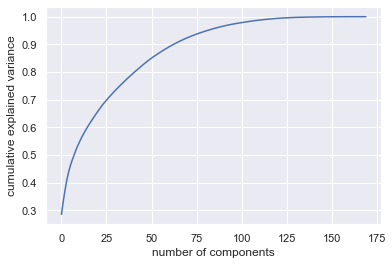

In [13]:
pca = PCA().fit(scaled)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [14]:
pca=PCA(75)
projected = pca.fit_transform(aps_predictive_data)
print(projected.data.shape)

(60000, 75)


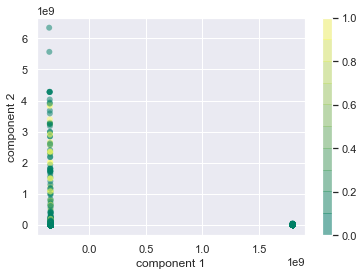

In [15]:
plt.scatter(projected[:, 0], projected[:, 1],
            c=failure, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('summer', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

In [16]:
#https://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_vs_lda.html?highlight=linear%20discriminant%20analysis
from sklearn import datasets
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
iris = datasets.load_iris()
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [17]:

lda = LinearDiscriminantAnalysis()
projected = lda.fit(scaled, failure).transform(scaled)

colors = ['navy', 'turquise', 'darkorange']
lw = 2
projected


array([[ 0.06111998],
       [-0.11022114],
       [-0.0244699 ],
       ...,
       [-0.25818385],
       [-0.57225775],
       [-0.27956011]])

In [18]:
plt.figure()
for color, i, target_name in zip(colors, [0, 1, 2], [0,1,2]):
    plt.scatter(projected[failure == i, 0], projected[failure == i, 1], alpha=.8, color=color,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('LDA')

plt.show()

IndexError: index 1 is out of bounds for axis 1 with size 1

<Figure size 432x288 with 0 Axes>

In [19]:
ms_predictive_data = pd.read_csv('data/Microsoft Dataset/predictive modeling telemetry.csv')

In [20]:
ms_predictive_data

,datetime,machineID,volt,rotate,pressure,vibration
0,1/1/2015 6:00:00 AM,1,176.217853,418.504078,113.077935,45.087686
1,1/1/2015 7:00:00 AM,1,162.879223,402.747490,95.460525,43.413973
2,1/1/2015 8:00:00 AM,1,170.989902,527.349825,75.237905,34.178847
3,1/1/2015 9:00:00 AM,1,162.462833,346.149335,109.248561,41.122144
4,1/1/2015 10:00:00 AM,1,157.610021,435.376873,111.886648,25.990511
...,...,...,...,...,...,...
876095,1/1/2016 2:00:00 AM,100,179.438162,395.222827,102.290715,50.771941
876096,1/1/2016 3:00:00 AM,100,189.617555,446.207972,98.180607,35.123072
876097,1/1/2016 4:00:00 AM,100,192.483414,447.816524,94.132837,48.314561
876098,1/1/2016 5:00:00 AM,100,165.475310,413.771670,104.081073,44.835259


In [21]:
ms_predictive_data.describe()

,machineID,volt,rotate,pressure,vibration
count,876100.000000,876100.000000,876100.000000,876100.000000,876100.000000
mean,50.500000,170.777736,446.605119,100.858668,40.385007
std,28.866087,15.509114,52.673886,11.048679,5.370361
min,1.000000,97.333604,138.432075,51.237106,14.877054
25%,25.750000,160.304927,412.305714,93.498181,36.777299
50%,50.500000,170.607338,447.558150,100.425559,40.237247
75%,75.250000,181.004493,482.176600,107.555231,43.784938
max,100.000000,255.124717,695.020984,185.951998,76.791072


In [22]:
ms_machines = pd.read_csv('data/Microsoft Dataset/predictive modeling machines.csv')
ms_machines.describe()

,machineID,age
count,100.000000,100.000000
mean,50.500000,11.330000
std,29.011492,5.856974
min,1.000000,0.000000
25%,25.750000,6.750000
50%,50.500000,12.000000
75%,75.250000,16.000000
max,100.000000,20.000000
